In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import kstest
import random

In [2]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme


In [3]:
 set_nb_theme('chesterish')


In [4]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [5]:
df=pd.read_csv('cardio_train.csv',sep=";")

In [6]:
print(df)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0 

In [25]:


from collections import defaultdict
from math import sqrt
def Ex(data):
    counter = defaultdict(float)
    
    for elem in data:
        counter[elem] += 1
    s = 0 
    for i in counter.keys():
        s+=i*counter[i]
    return s/len(data)

def Dx(data):
    E = Ex(data)
    counter = defaultdict(float)
    for elem in data:
        counter[elem] += 1
    s = 0 
    for i in counter.keys():
        s+=((i)**2)*counter[i]
        
    return s/len(data)-E*E

In [26]:
array_1 = df[(df['gender'] == 1) & (df['cardio'] == 1) & (df["height"]<190) & (df["height"]>130)] 
array_2 = df[(df['gender'] == 1) & (df['cardio'] == 0) & (df["height"]<190) & (df["height"]>130)]
array_3 = df[(df['gender'] == 2) & (df['cardio'] == 1) & (df["height"]<190) & (df["height"]>130)]
array_4 = df[(df['gender'] == 2) & (df['cardio'] == 0) & (df["height"]<190) & (df["height"]>130)]

In [27]:
# Добавляем плюс минус 2.5 потому что ну и еще погрешность плюс минус 1.5 оптимально так как прибор точно округляет (-0.5,0.5) плюс волосы человека могут мешать при измерении) а также осанка и люди свой рост завышать любят

In [28]:
x_g1_c1= list(array_1['height'])
x_g1_c2= list(array_2['height'])
x_g2_c1= list(array_3['height'])
x_g2_c2= list(array_4['height'])
delta = [random.uniform(-2.7,2.7) for _ in range(max(len(x_g1_c1),len(x_g1_c2),len(x_g2_c1),len(x_g2_c2)))]
x_g1_c1= [x + d for x, d in zip(x_g1_c1, delta)]
x_g1_c2= [x + d for x, d in zip(x_g1_c2, delta)]
x_g2_c1= [x + d for x, d in zip(x_g2_c1, delta)]
x_g2_c2= [x + d for x, d in zip(x_g2_c2, delta)]


In [29]:
colors = ['#E69F00', '#56B4E9']
cardio = [0,1]
from matplotlib import rcParams
rcParams['figure.figsize'] = 9, 4

In [30]:
def show_visual(x_g1_c1):
    plt.hist(x_g1_c1, bins = 45,density=True, stacked=True,
    color = colors[1], label=cardio[1])
    plt.plot(np.arange(59,207,0.001),scipy.stats.norm.pdf(np.arange(59,207,0.001),Ex(x_g1_c1),sqrt(Dx(x_g1_c1))))
    plt.legend()
    plt.xlabel('Height (cm)')
    plt.ylabel('quantity of people')
    plt.title('Histogram of height by target attribute')
    plt.show()
    
    E = Ex(x_g1_c1)
    D = Dx(x_g1_c1)
    plt.hist(x_g1_c1, histtype='step', cumulative=True,density=True, bins=len(sorted(x_g1_c1)))
    plt.plot(np.arange(55,250,0.001),[scipy.stats.norm.cdf(x,E,sqrt(D)) for x in np.arange(55,250,0.001)])
    plt.xlabel('Height (cm)')
    plt.ylabel('quantity of people')
    plt.title('height EDF for cardio="0"')
    plt.show()
    print(kstest(x_g1_c1,lambda x : scipy.stats.norm.cdf(x,Ex(x_g1_c1),sqrt(Dx(x_g1_c1)))))

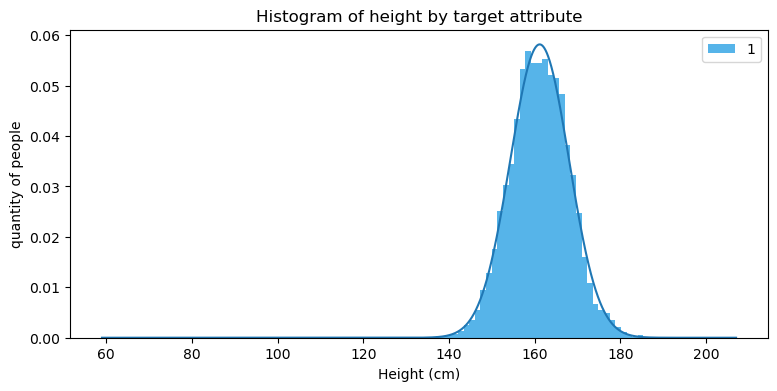

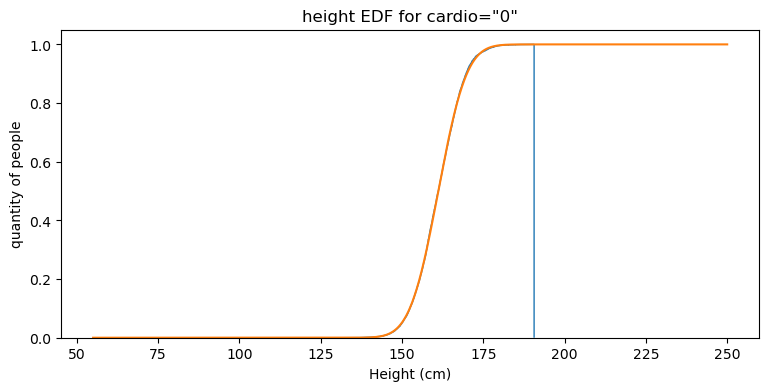

KstestResult(statistic=0.009784337664284604, pvalue=0.026348107512679242)


In [31]:
show_visual(x_g1_c1)

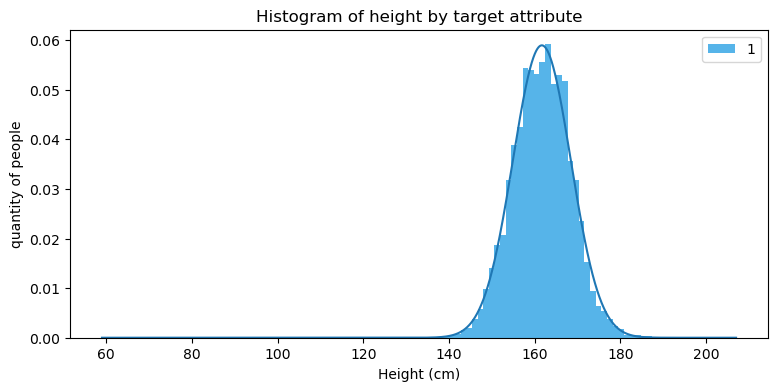

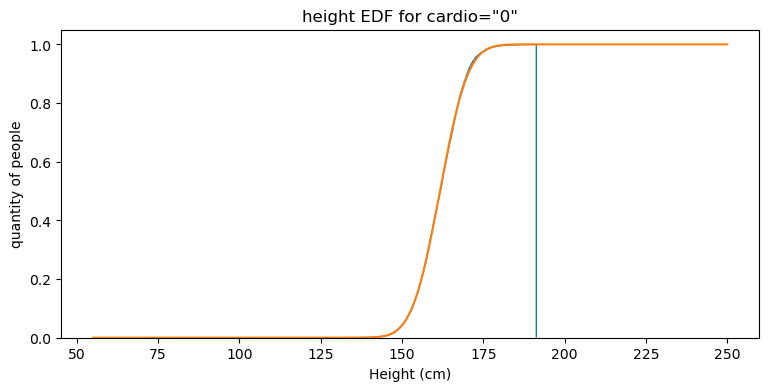

KstestResult(statistic=0.011234508421149814, pvalue=0.0061797626518926615)


In [32]:
show_visual(x_g1_c2)

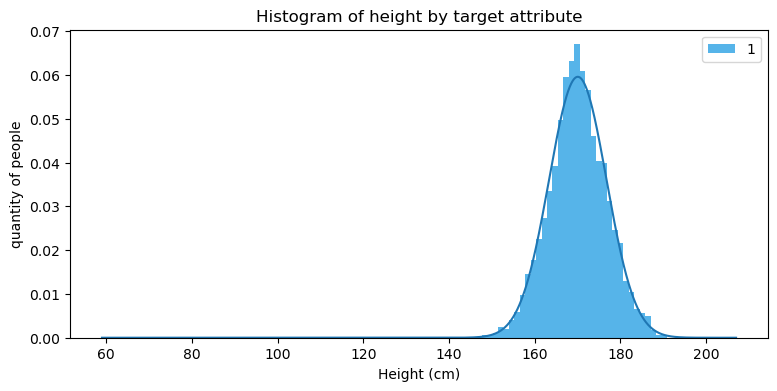

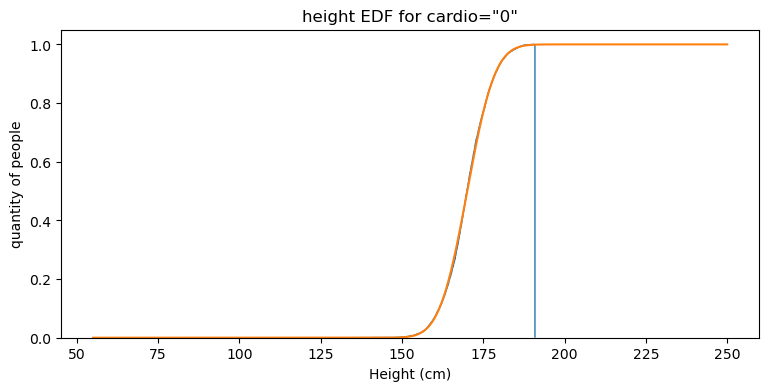

KstestResult(statistic=0.018446391312720523, pvalue=0.0004591305470250726)


In [33]:
show_visual(x_g2_c1)

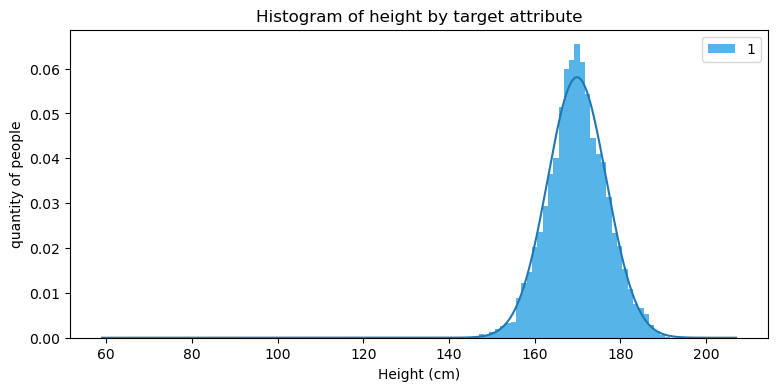

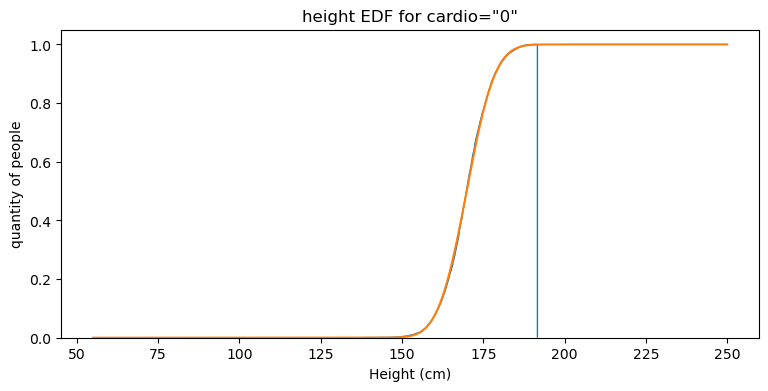

KstestResult(statistic=0.017143061997900166, pvalue=0.0016565864498820787)


In [34]:
show_visual(x_g2_c2)

### Вес

In [37]:
array_1 = df[df['cardio'] == 1 & (df["weight"]<200) & (df["weight"]>60)] 
array_2 = df[df['cardio'] == 0 & (df["weight"]<200) & (df["weight"]>60)] 

### Попробуем аппроскимировать индекс массы тела 


In [38]:


x_c2= list(array_2['weight']/(array_2['height']**2))

delta = [random.uniform(-0.00085,0.00085) for _ in range(max(len(x_c1),len(x_c2)))]
x_c1= [x + d for x, d in zip(x_c1, delta)]
x_c2= [x + d for x, d in zip(x_c2, delta)]


### Либо логнорм либо экспонента

In [39]:
def show_visual_beta(x):
    plt.hist(x,  bins='auto',density=True, stacked=True,
    color = colors[1], label=cardio[1])
    tetta = Dx(x)/Ex(x)
    k = Ex(x)/tetta
    print(Ex(x))
    params = scipy.stats.lognorm.fit(x)
    shape,loc,scale = params 
    #plt.plot(np.arange(0,50,0.001),scipy.stats.gamma.pdf(np.arange(0,50,0.001),k,loc=0,scale=tetta))
    #plt.plot(np.arange(0,50,0.001),scipy.stats.norm.pdf(np.arange(0,50,0.001),Ex(x),sqrt(Dx(x))))
    #plt.plot(np.arange(0,50,0.001),scipy.stats.expon.pdf(np.arange(0,50,0.001),scale=1/Ex(x))
    plt.plot(np.arange(min(x),max(x),0.001),scipy.stats.lognorm.pdf(np.arange(min(x),max(x),0.001),s=shape,loc=loc,scale=scale))

    plt.xlabel('Height (cm)')
    plt.ylabel('quantity of people')
    plt.title('Histogram of height by target attribute')
    plt.show()
    
    E = Ex(x)
    D = Dx(x)
    plt.hist(x, histtype='step', cumulative=True,density=True, bins=len(sorted(x)))
    plt.plot(np.arange(0,50,0.001),[scipy.stats.norm.cdf(x,E,sqrt(D)) for x in np.arange(0,50,0.001)])
    plt.xlabel('Height (cm)')
    plt.ylabel('quantity of people')
    plt.title('height EDF for cardio="0"')
    plt.show()
    plt.hist(x, histtype='step', cumulative=True,density=True, bins=len(sorted(x)))
    plt.plot(np.arange(0,50,0.001),[scipy.stats.gamma.cdf(x,k,scale=tetta) for x in np.arange(0,50,0.001)])
    plt.show()
    plt.hist(x, histtype='step', cumulative=True,density=True, bins=len(sorted(x)))
    plt.plot(np.arange(0,50,0.001),[scipy.stats.lognorm.cdf(x,s=scale,loc=loc,scale=scale) for x in np.arange(0,50,0.001)])
    plt.show()
    print(kstest(x,lambda x : scipy.stats.gamma.cdf(x,k,loc=0,scale=tetta)))
    print(kstest(x,lambda x : scipy.stats.norm.cdf(x,Ex(x),sqrt(Dx(x)))))
    print(kstest(x,lambda x : scipy.stats.expon.cdf(x,loc=0,scale=1/Ex(x))))

28.56461591161521


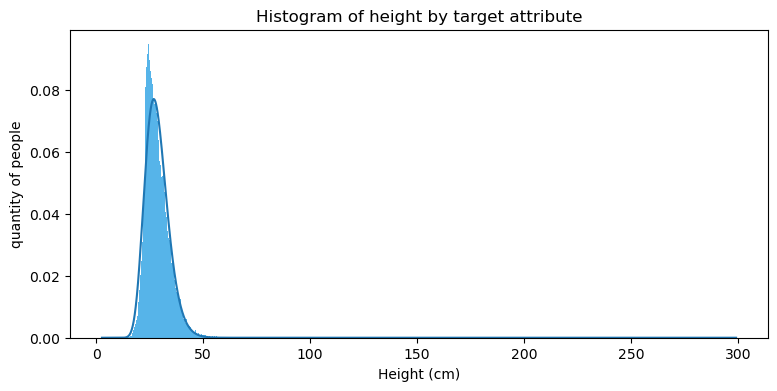

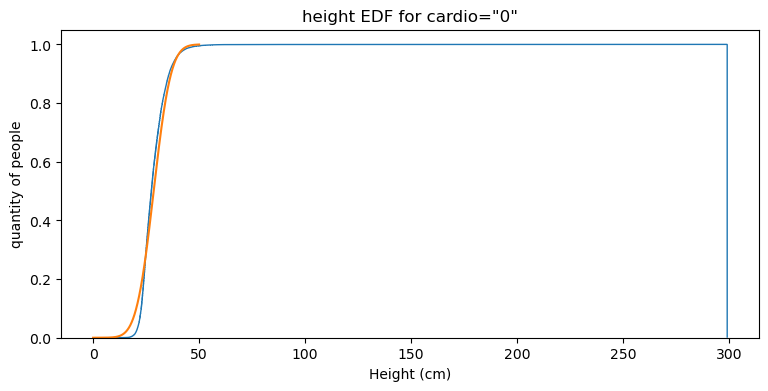

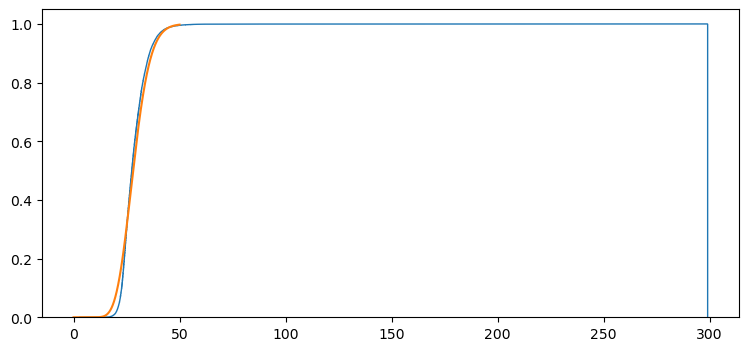

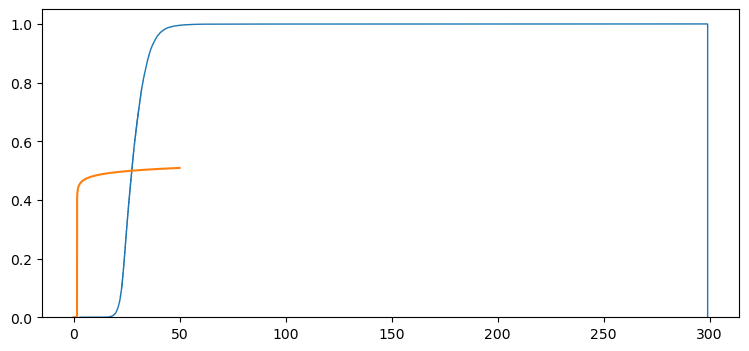

KstestResult(statistic=0.08508761520638118, pvalue=9.058550781529456e-221)
KstestResult(statistic=0.08912138169771576, pvalue=3.4142205962732393e-242)
KstestResult(statistic=1.0, pvalue=0.0)


In [23]:
array_1 = df[df['cardio'] == 1] 
x_c1= list(array_1['weight']/((array_1['height']/100)**2))
delta = [random.uniform(-1,1) for _ in range(max(len(x_c1),len(x_c2)))]
x_c1= [x + d for x, d in zip(x_c1, delta)]
show_visual_beta(x_c1)

26.554252463953702


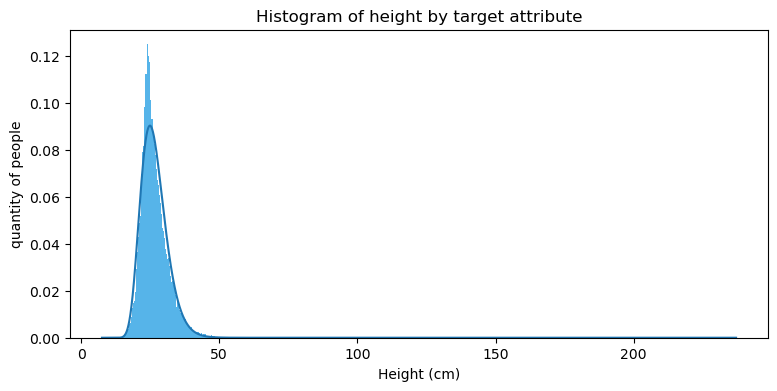

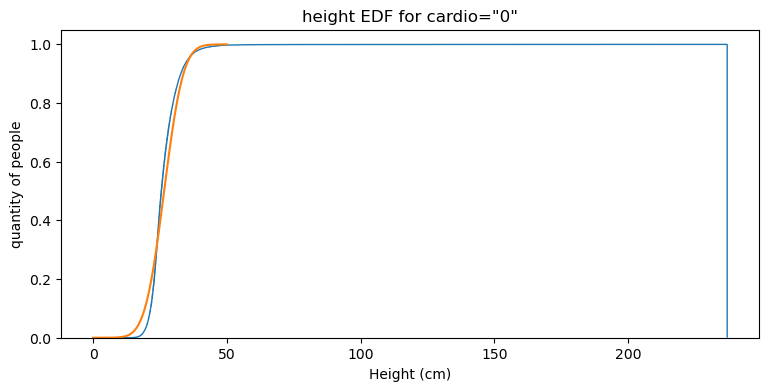

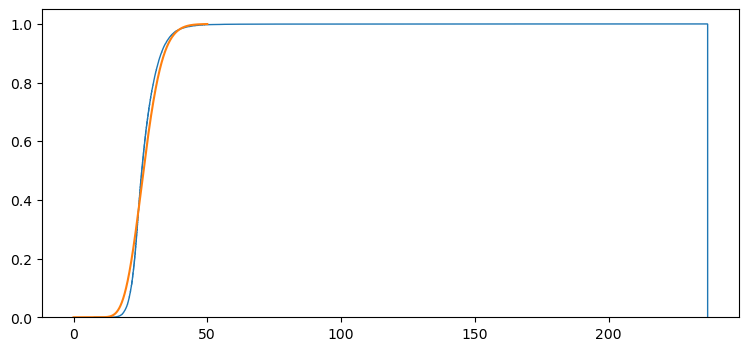

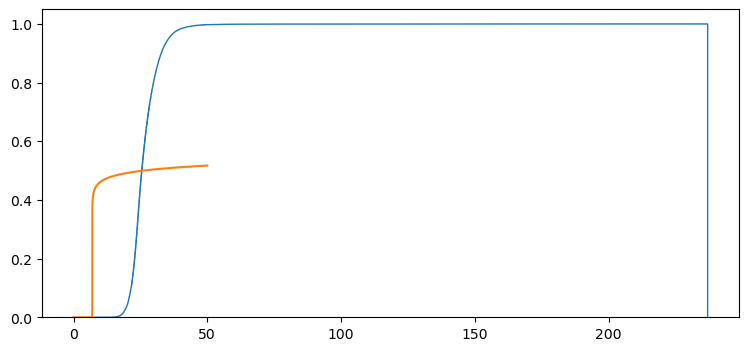

KstestResult(statistic=0.0873268884428029, pvalue=8.104004156195184e-233)
KstestResult(statistic=0.10000943178904942, pvalue=2.2291375107635336e-305)
KstestResult(statistic=1.0, pvalue=0.0)


In [24]:
array_2 = df[df['cardio'] == 0] 
x_c2= list(array_2['weight']/((array_2['height']/100)**2))
delta = [random.uniform(-1,1) for _ in range(max(len(x_c1),len(x_c2)))]
x_c2= [x + d for x, d in zip(x_c2, delta)]
show_visual_beta(x_c2)

### Не получилось у нас аппроксимировать ИМТ от целевого признака

In [45]:
def show_visual_beta(x):
    plt.hist(x,  bins='auto',density=True, stacked=True,
    color = colors[1], label=cardio[1])
    tetta = Dx(x)/Ex(x)
    k = Ex(x)/tetta
    params = scipy.stats.lognorm.fit(x)
    shape,loc,scale = params 
    plt.plot(np.arange(min(x),max(x),0.001),scipy.stats.lognorm.pdf(np.arange(min(x),max(x),0.001),s=shape,loc=loc,scale=scale))
    plt.xlabel('Height (cm)')
    plt.ylabel('quantity of people')
    plt.title('Histogram of height by target attribute')
    plt.show()
    
    E = Ex(x)
    D = Dx(x)
    plt.hist(x, histtype='step', cumulative=True,density=True, bins=len(sorted(x)))
    plt.plot(np.arange(min(x),max(x),0.001),[scipy.stats.lognorm.cdf(x,shape,loc=loc,scale=scale) for x in np.arange(min(x),max(x),0.001)])
    plt.show()
    print(kstest(x,lambda x : scipy.stats.gamma.cdf(x,k,loc=0,scale=tetta)))
    print(kstest(x,lambda x : scipy.stats.norm.cdf(x,Ex(x),sqrt(Dx(x)))))
    print(kstest(x,lambda x : scipy.stats.expon.cdf(x,loc=0,scale=1/Ex(x))))
    print(kstest(x,lambda x : scipy.stats.lognorm.cdf(x,shape,loc=loc,scale=scale)))

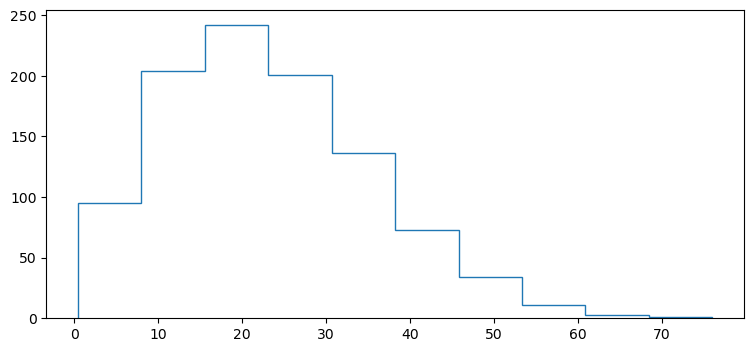

23.200305920523064


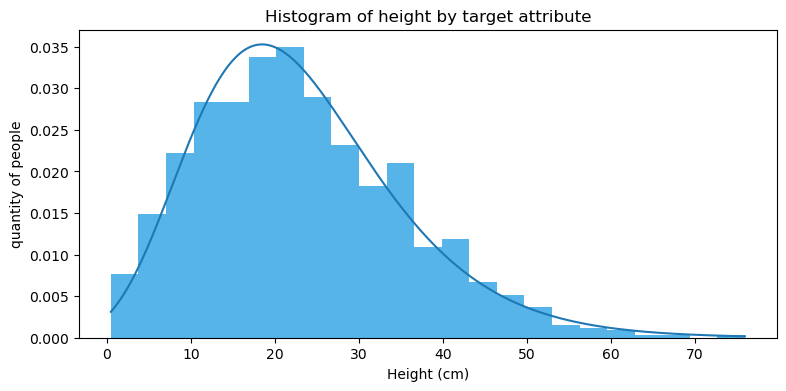

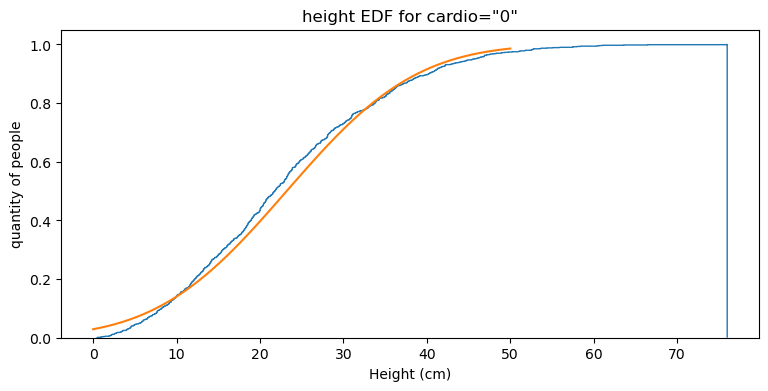

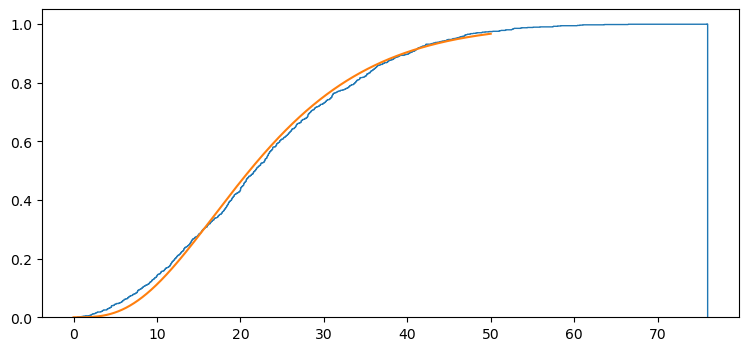

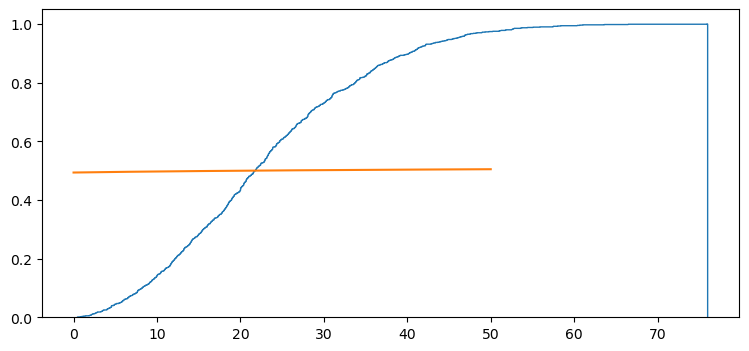

KstestResult(statistic=0.03381528671925719, pvalue=0.19841477669844598)
KstestResult(statistic=0.055785773521487836, pvalue=0.0038062651819411775)
KstestResult(statistic=0.9999743863027476, pvalue=0.0)


In [40]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import zeros, arange
from numpy.random import uniform
from scipy.linalg import norm

N = 1000
N_t = 1000
dh = 1

XY = zeros((N, 2))

for _ in range(N_t):
    XY += uniform(-dh, dh, (N, 2))
r = norm(XY, axis=1)

n_array = arange(N)

counts, bins = np.histogram(r)
plt.stairs(counts, bins)
plt.show()
delta = [random.uniform(-0.01,0.01) for _ in range(len(r))]
x_g1_c1= [x + d for x, d in zip(r, delta)]
show_visual_beta(x_g1_c1)

29.088691980724473


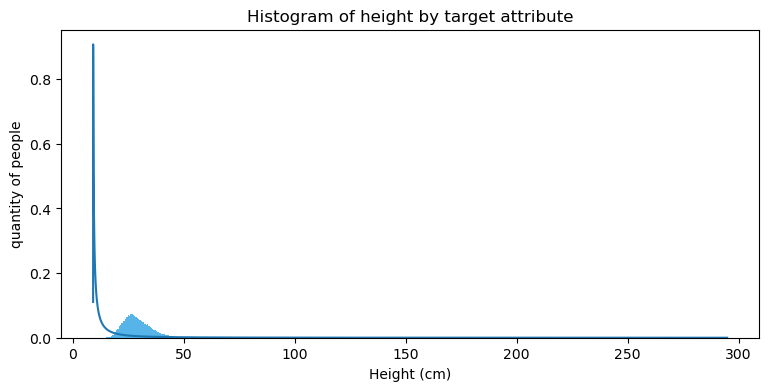

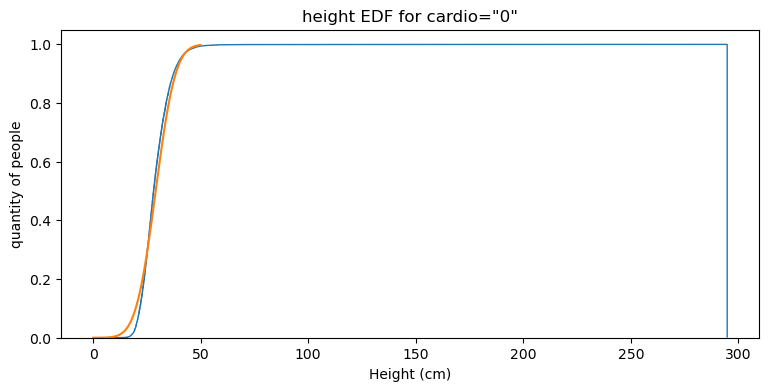

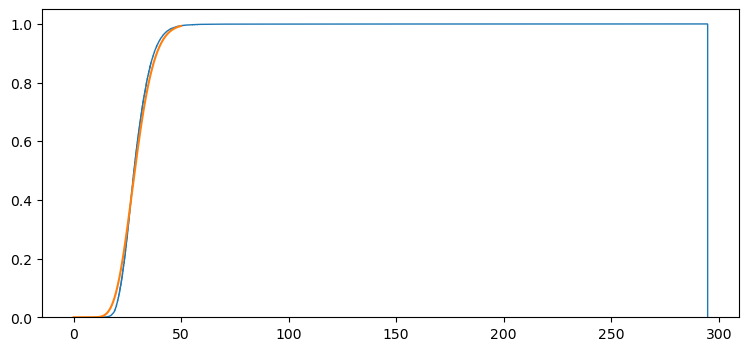

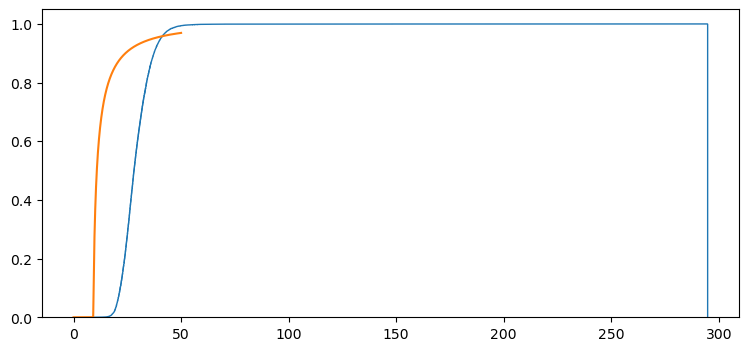

KstestResult(statistic=0.052325992534810656, pvalue=2.9386118548646546e-54)
KstestResult(statistic=0.06585854247955214, pvalue=9.944197540035377e-86)
KstestResult(statistic=1.0, pvalue=0.0)


In [41]:
array_1_1 = df[(df['cardio'] == 1) & (df['gender']==1)] 
x_g1_c1= list(array_1_1['weight']/((array_1_1['height']/100)**2))
delta = [random.uniform(-4,4) for _ in range(len(x_g1_c1))]
x_g1_c1= [x + d for x, d in zip(x_g1_c1, delta)]
show_visual_beta(x_g1_c1)

25.93475161326948


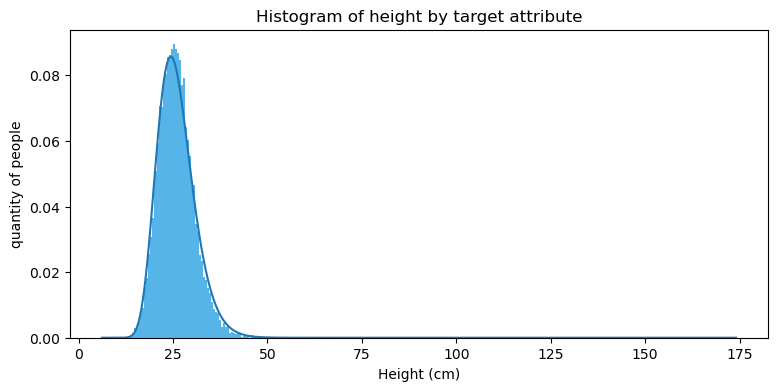

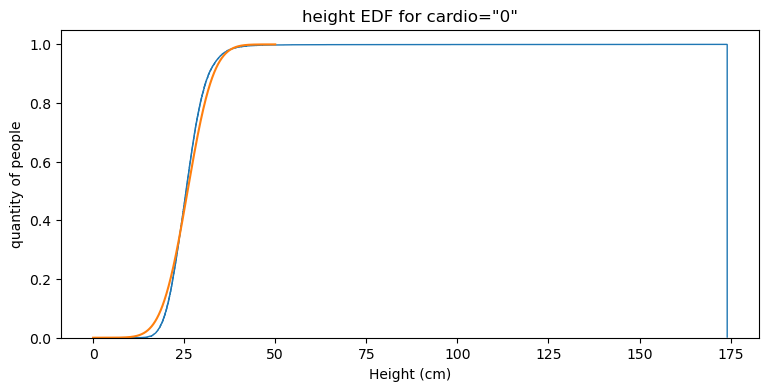

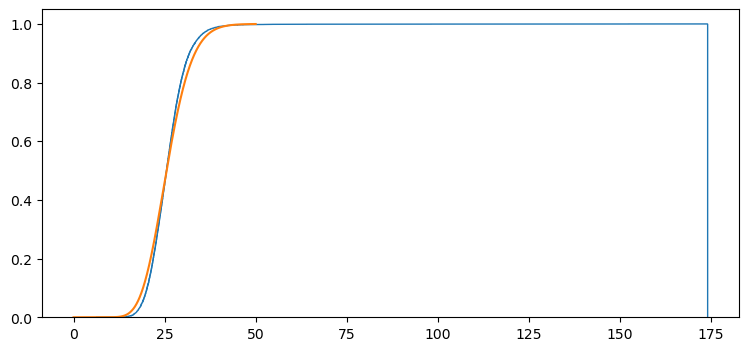

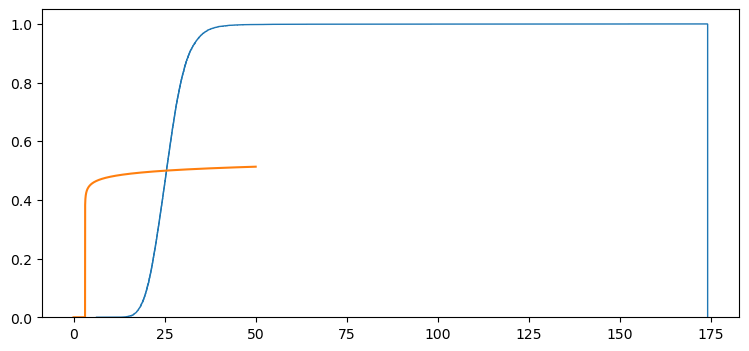

KstestResult(statistic=0.05273952707600893, pvalue=1.043159387392941e-29)
KstestResult(statistic=0.06689642489549652, pvalue=1.4964884489857354e-47)
KstestResult(statistic=1.0, pvalue=0.0)


In [42]:
array_1_1 = df[(df['cardio'] == 0) & (df['gender']==2)] 
x_g1_c1= list(array_1_1['weight']/((array_1_1['height']/100)**2))
delta = [random.uniform(-4.4,4.4) for _ in range(len(x_g1_c1))]
x_g1_c1= [x + d for x, d in zip(x_g1_c1, delta)]
show_visual_beta(x_g1_c1)

27.557247806226417


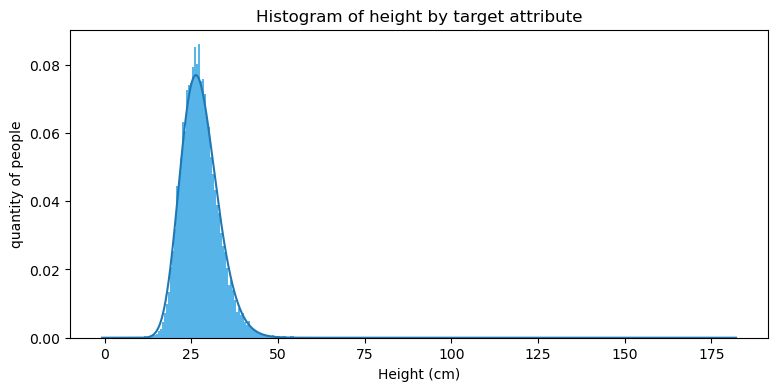

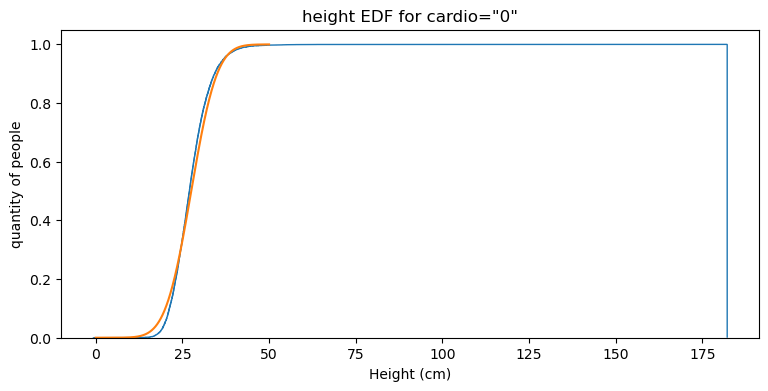

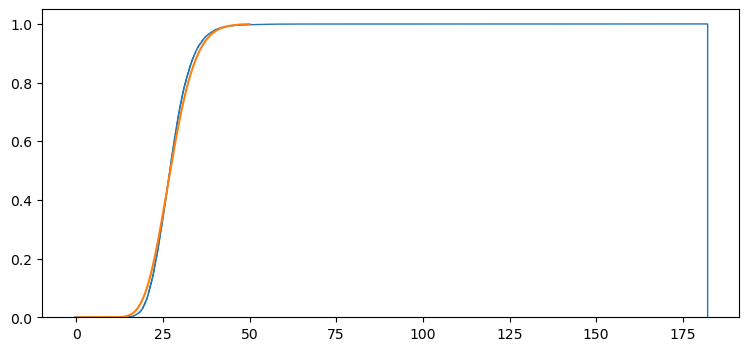

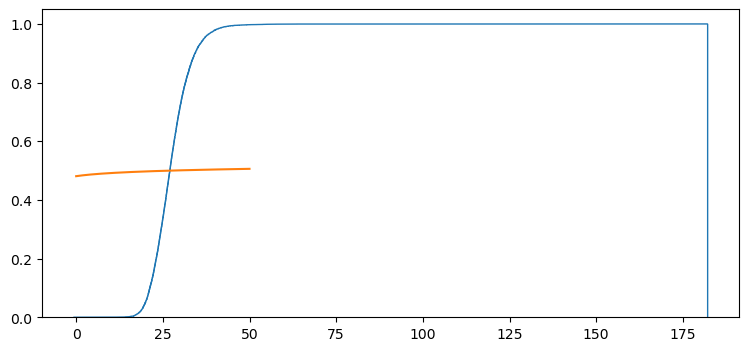

KstestResult(statistic=0.038315168309447034, pvalue=3.315798137350036e-16)
KstestResult(statistic=0.05786422555014803, pvalue=2.009898955589234e-36)
KstestResult(statistic=0.9998382269675645, pvalue=0.0)


In [43]:
array_1_1 = df[(df['cardio'] == 1) & (df['gender']==2)] 
x_g1_c1= list(array_1_1['weight']/((array_1_1['height']/100)**2))
delta = [random.uniform(-4.5,4.5) for _ in range(len(x_g1_c1))]
x_g1_c1= [x + d for x, d in zip(x_g1_c1, delta)]
show_visual_beta(x_g1_c1)

### Посмотрим на ap_hi и ap_lo

In [44]:
array_1 = df[(df['cardio'] == 1) & (df["gender"]==1) & (df["ap_hi"]<260) & (df["ap_hi"]>80)] 
array_2 = df[(df['cardio'] == 0) & (df["gender"]==1) & (df["ap_hi"]<260) & (df["ap_hi"]>70)] 

In [45]:

x_c2= list(array_1['ap_hi'])

In [46]:
def show_v(x):
    plt.hist(x,  bins=24,density=True, stacked=True,color = colors[1], label=cardio[1])
    tetta = Dx(x)/Ex(x)
    k = Ex(x)/tetta
    params = scipy.stats.lognorm.fit(x)
    p = scipy.stats.laplace.fit(x)
    print(p)
    shape,loc,scale = params 
    s,sc = p
    plt.plot(np.arange(min(x),max(x),0.001),scipy.stats.gamma.pdf(np.arange(min(x),max(x),0.001),k,loc=0,scale=tetta))
    plt.plot(np.arange(min(x),max(x),0.001),scipy.stats.norm.pdf(np.arange(min(x),max(x),0.001),Ex(x),sqrt(Dx(x))))
    plt.plot(np.arange(min(x),max(x),0.001),scipy.stats.lognorm.pdf(np.arange(min(x),max(x),0.001),s=shape,loc=loc,scale=scale))
    plt.plot(np.arange(min(x),max(x),0.001),scipy.stats.laplace.pdf(np.arange(min(x),max(x),0.001),s,scale=sc))
    #plt.plot(np.arange(0,50,0.001),scipy.stats.expon.pdf(np.arange(0,50,0.001),scale=1/Ex(x)))
    #plt.xlabel('Height (cm)')
    #plt.ylabel('quantity of people')
    #plt.title('Histogram of height by target attribute')
    #plt.show()
    plt.show()
    E = Ex(x)
    D = Dx(x)
    #plt.hist(x, histtype='step', cumulative=True,density=True, bins=len(sorted(x)))
    #plt.plot(np.arange(min(x),max(x),0.001),[scipy.stats.norm.cdf(x,E,sqrt(D)) for x in np.arange(min(x),max(x),0.001)])
    #plt.xlabel('Height (cm)')
    #plt.ylabel('quantity of people')
    #plt.title('height EDF for cardio="0"')
    #plt.show()
    #plt.hist(x, histtype='step', cumulative=True,density=True, bins=len(sorted(x)))
    #plt.plot(np.arange(min(x),max(x),0.001),[scipy.stats.gamma.cdf(x,k,scale=tetta) for x in np.arange(min(x),max(x),0.001)])
    #plt.show()
    plt.hist(x, histtype='step', cumulative=True,density=True, bins=len(sorted(x)))
    plt.plot(np.arange(min(x),max(x),0.001),[scipy.stats.lognorm.cdf(x,shape,loc=loc,scale=scale) for x in np.arange(min(x),max(x),0.001)])
    plt.show()
    plt.hist(x, histtype='step', cumulative=True,density=True, bins=len(sorted(x)))
    plt.plot(np.arange(min(x),max(x),0.001),[scipy.stats.laplace.cdf(x,s,scale=sc) for x in np.arange(min(x),max(x),0.001)])
    plt.show()
    print(kstest(x,lambda x : scipy.stats.gamma.cdf(x,k,loc=0,scale=tetta)))
    print(kstest(x,lambda x : scipy.stats.norm.cdf(x,Ex(x),sqrt(Dx(x)))))
    print(kstest(x,lambda x : scipy.stats.lognorm.cdf(x,shape,loc=loc,scale=scale)))
    print(kstest(x,lambda x : scipy.stats.laplace.cdf(x,s,scale=sc)))

(131.54343394155842, 14.727150237694554)


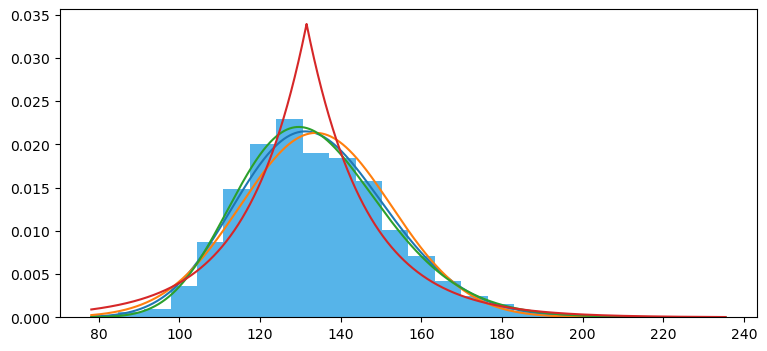

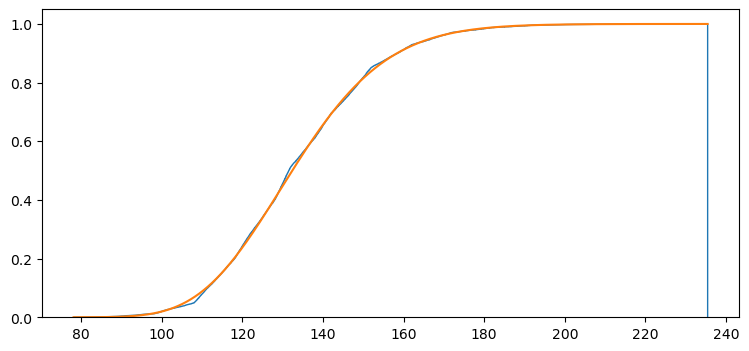

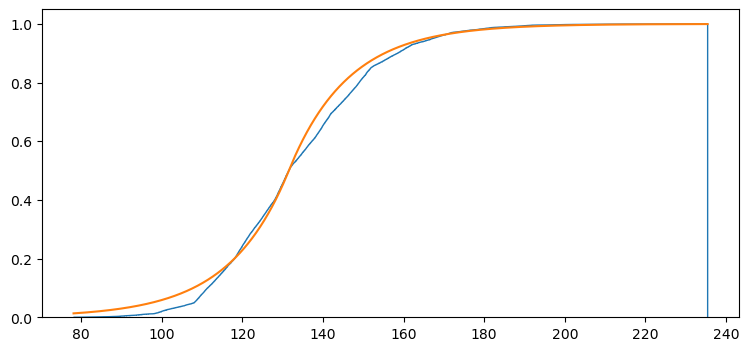

KstestResult(statistic=0.032439117898901415, pvalue=5.041208611893801e-21)
KstestResult(statistic=0.050832841995860634, pvalue=5.1436724035154825e-51)
KstestResult(statistic=0.020692439804694707, pvalue=8.2897492350964e-09)
KstestResult(statistic=0.0673062511422039, pvalue=3.774291000306242e-89)


In [47]:
x_c1= list(array_1['ap_hi'])
delta = [random.uniform(-12,12) for _ in range(len(x_c1))]
x_c1= [x + d for x, d in zip(x_c1, delta)]
show_v(x_c1)

In [48]:
array_1 = df[(df['cardio'] == 1) & (df["gender"]==1) & (df["ap_hi"]<115) & (df["ap_hi"]>30)] 
array_2 = df[(df['cardio'] == 1) & (df["gender"]==1) & (df["ap_hi"]<260) & (df["ap_hi"]>=115)] 
x_c2_1= list(array_1['ap_hi'])
x_c2_2= list(array_2['ap_hi'])
delta = [random.uniform(-10,10) for _ in range(len(x_c2_1))]
x_c2_1= [x + d for x, d in zip(x_c2_1, delta)]
delta = [random.uniform(-10,10) for _ in range(len(x_c2_2))]
x_c2_2= [x + d for x, d in zip(x_c2_2, delta)]

In [49]:
def show_v(x):
    p = scipy.stats.expon.fit(x)
    print(p)
    loc,scale = p 
    plt.hist(x,  bins=11,density=True, stacked=True,color = colors[1], label=cardio[1])
    plt.plot(np.arange(min(x),max(x),0.001),scipy.stats.expon.pdf(np.arange(min(x),max(x),0.001),loc=loc,scale=scale))
    print(kstest(x,lambda x : scipy.stats.laplace.cdf(x,loc=loc,scale=scale)))


(70.316967238266, 36.14510999149741)
KstestResult(statistic=0.6652075801107591, pvalue=0.0)


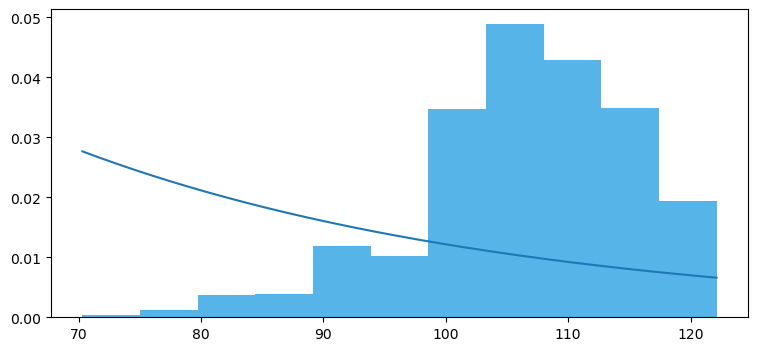

In [50]:
show_v(x_c2_1)

(106.30153427696415, 30.076061956504944)
KstestResult(statistic=0.5572644658553941, pvalue=0.0)


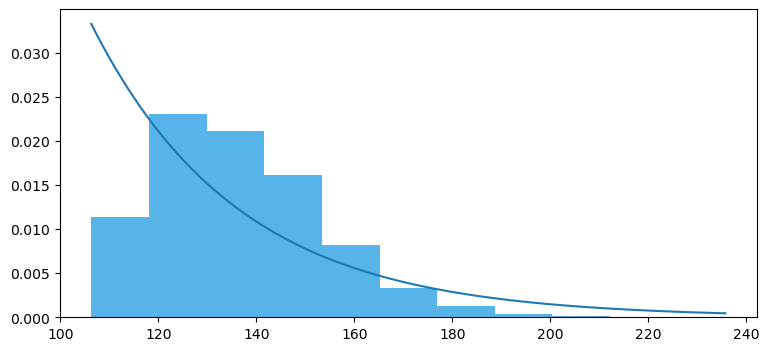

In [51]:
show_v(x_c2_2)

In [52]:
array_1 = df[(df['cardio'] == 1) & (df["gender"]==1) & (df["ap_lo"]<200) & (df["ap_lo"]>50)] 
array_2 = df[(df['cardio'] == 0) & (df["gender"]==1) & (df["ap_lo"]<200) & (df["ap_lo"]>50)] 

(44.03207064154817, 33.221803073434536)
KstestResult(statistic=0.6475827586217617, pvalue=0.0)


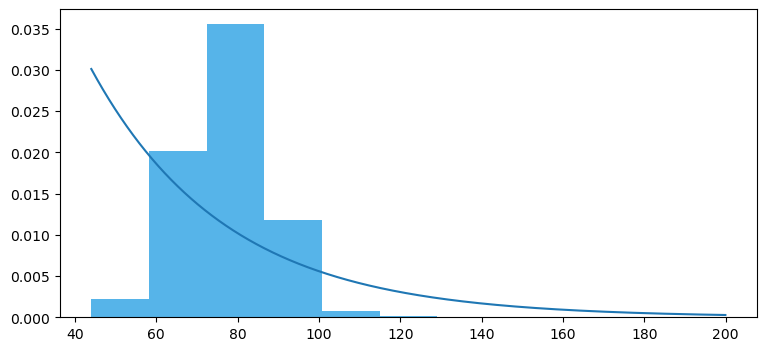

In [53]:
x_c1= list(array_2['ap_lo'])
delta = [random.uniform(-11,10) for _ in range(len(x_c1))]
x_c1= [x + d for x, d in zip(x_c1, delta)]
show_v(x_c1)